In [7]:
net_df, corrs = get_graph_by_name("SiouxFalls")
graph = gt.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])

l = np.maximum(np.sum(corrs, axis=1), 1e-6)
w = np.maximum(np.sum(corrs, axis=0), 1e-6)

zones_num = len(l)
sources = np.arange(zones_num)
targets = np.arange(zones_num)

params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)

graph type:  SiouxFalls


In [9]:
oracle = DualOracle(graph, l, w, params, net_df=net_df)

ustm_stacker = OracleStacker(oracle, graph, sources, targets)
sinkhorn_stacker = OracleSinkhornStacker(oracle, graph, sources, targets, l, w, params)
acrcd_stacker = ACRCDOracleStacker(oracle, graph, sources, targets)

In [34]:
def calc_custom_metric(results, oracle_stacker):
    x = results.history_count_calls
    dual_gap = results.history_dual_gap
    dual_gap_clipped = np.maximum(0, dual_gap)
    la_mu_end_norm = np.linalg.norm(np.hstack([oracle_stacker.optim_params.la, oracle_stacker.optim_params.mu]))               
    metric = 2 * np.array(results.history_la_mu_grad_norm) * la_mu_end_norm + dual_gap_clipped
    return metric

In [22]:
def custom_plot(x, y, label=None):
    plt.plot(x, y, label=label)
    plt.legend()
    plt.yscale("log")
    plt.show()

## Testing USTM

In [45]:
t_start = time.time()
results_ustm = ustm_mincost_mcf(ustm_stacker,  eps_abs=1e-4, eps_cons_abs=1e-4, max_iter=2000, stop_by_crit=True)
print(f"total time taken: {time.time() - t_start}")

first exceeding the limits:  0.16041110063971112
start optimizing
first dual_func:  11.621762504548435


100%|██████████| 2000/2000 [00:12<00:00, 154.69it/s]

total time taken: 12.932366371154785


x:  2001 len diual gap:  2001


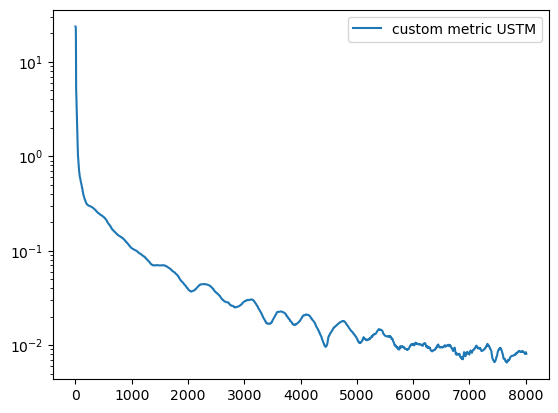

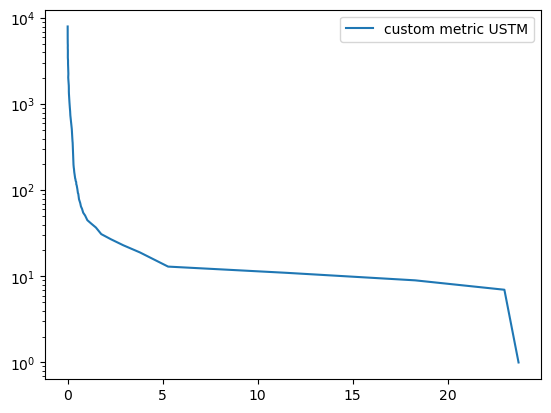

In [72]:
custom_metric_ustm = calc_custom_metric(results_ustm, ustm_stacker)
custom_plot(results_ustm.history_count_calls, custom_metric_ustm, label="custom metric USTM")
custom_plot(custom_metric_ustm, results_ustm.history_count_calls, label="custom metric USTM")


## Testing USTM + Sinkhorn

In [42]:
t, results_sinkhorn = ustm_sinkhorn_mincost_mcf(sinkhorn_stacker,  eps_abs=1e-2, eps_cons_abs=1e-2,
                                                max_iter=500, stop_by_crit=True)

Exception ignored in: <built-in method acquire of _thread.lock object at 0x7f1792a35fc0>
Traceback (most recent call last):
  File "/root/miniconda3/envs/gt/lib/python3.11/multiprocessing/popen_fork.py", line 66, in _launch
    self.pid = os.fork()
               ^^^^^^^^^
KeyboardInterrupt: 


51.63220277307579 4.7027446686171165e-08
start optimizing


 13%|█▎        | 64/500 [00:13<01:29,  4.88it/s]

STOP BY CRIT!!!


x:  66 len diual gap:  66


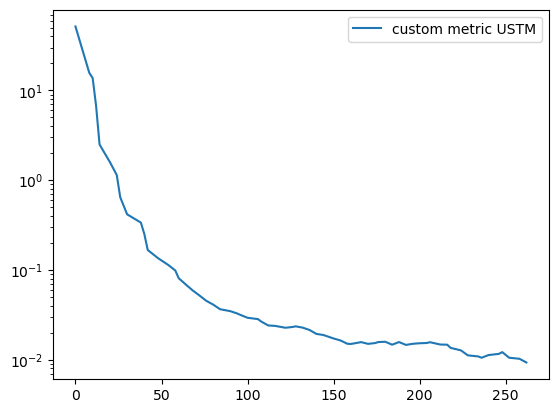

In [44]:
custom_metric_ustm = calc_custom_metric(results_sinkhorn, sinkhorn_stacker)
custom_plot(results_sinkhorn.history_count_calls, custom_metric_ustm, label="custom metric USTM")

## ACRCD

In [51]:
results_acrcd = ACRCD_star(acrcd_stacker, *acrcd_stacker.get_init_vars_block(), K=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/jupyter/transport/transport_network_optimization/transport_problem.py:168: RuntimeWarning: divide by zero encountered in log
  return np.sum(self.sigma(f)) + self.params.gamma * np.sum(d * np.log(d))
/home/jupyter/transport/transport_network_optimization/transport_problem.py:168: RuntimeWarning: invalid value encountered in multiply
  return np.sum(self.sigma(f)) + self.params.gamma * np.sum(d * np.log(d))
100%|██████████| 1000/1000 [00:01<00:00, 645.03it/s]


In [ ]:
def calc_custom_metric(results, oracle_stacker):
    dual_gap = results.history_dual_gap
    dual_gap_clipped = np.maximum(0, dual_gap)
    la_mu_end_norm = np.linalg.norm(np.hstack([oracle_stacker.optim_params.la, oracle_stacker.optim_params.mu]))               
    metric = 2 * np.array(results.history_la_mu_grad_norm) * la_mu_end_norm + dual_gap_clipped
    return metric

In [67]:
x_la_mu = results_acrcd.history_la_mu_calls
x_t = results_acrcd.history_t_calls

dual_gap = results_acrcd.history_dual_gap

In [71]:
len(results_acrcd.history_la_mu_grad_norm)

506

In [68]:
len(dual_gap)

1000

In [69]:
calc_custom_metric(results_acrcd, acrcd_stacker)

x:  0 len diual gap:  1000


ValueError: operands could not be broadcast together with shapes (506,) (1000,) 

In [55]:
len(results_acrcd.history_la_mu_grad_norm)

506

In [ ]:
len(results_acrcd.history)

In [58]:
len(results_acrcd.history_dual_gap)

1000